## When to use a Sequential model?

>A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

# Conv2D layer

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581a58be_convolution-schematic/convolution-schematic.gif)
<centre>Convolution with 3×3 Filter. Source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution</centre>



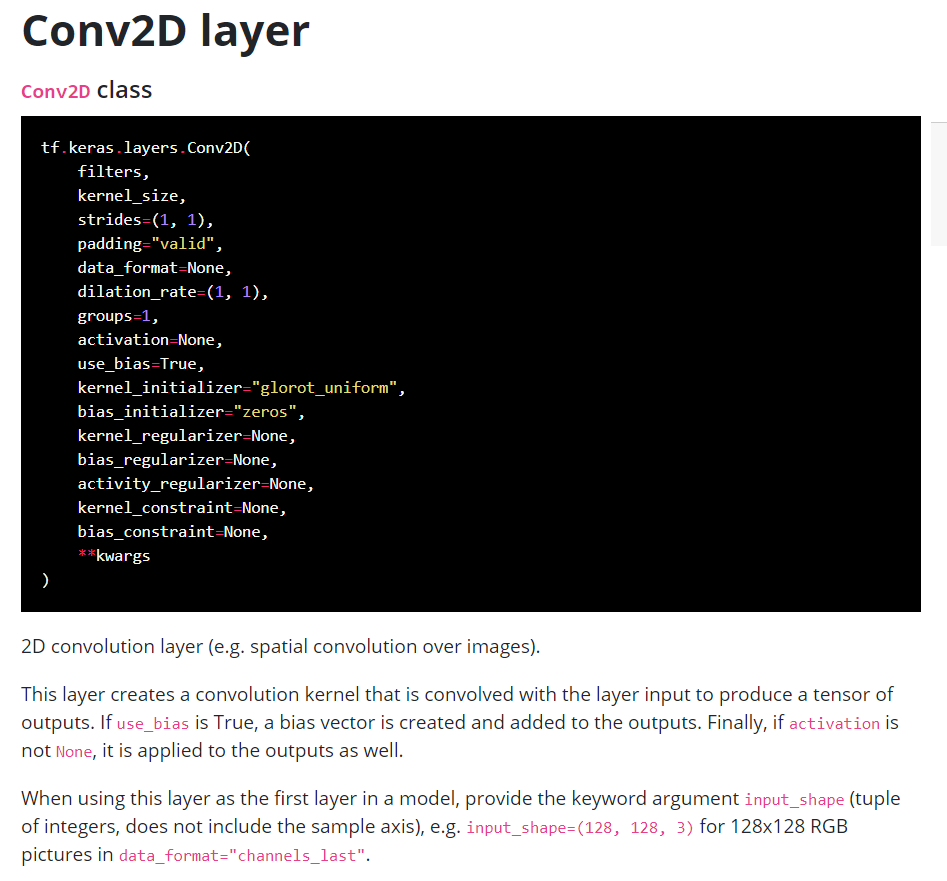

# MaxPooling2D layer

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581a57fe_maxpool/maxpool.jpeg)
<centre>Max Pooling with 2x2 filter and stride of 2. Source: http://cs231n.github.io/convolutional-networks/</centre>



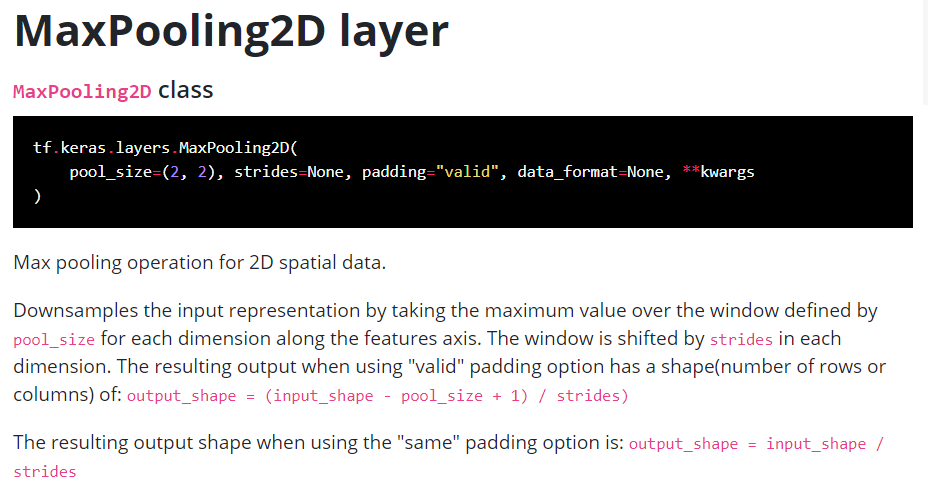

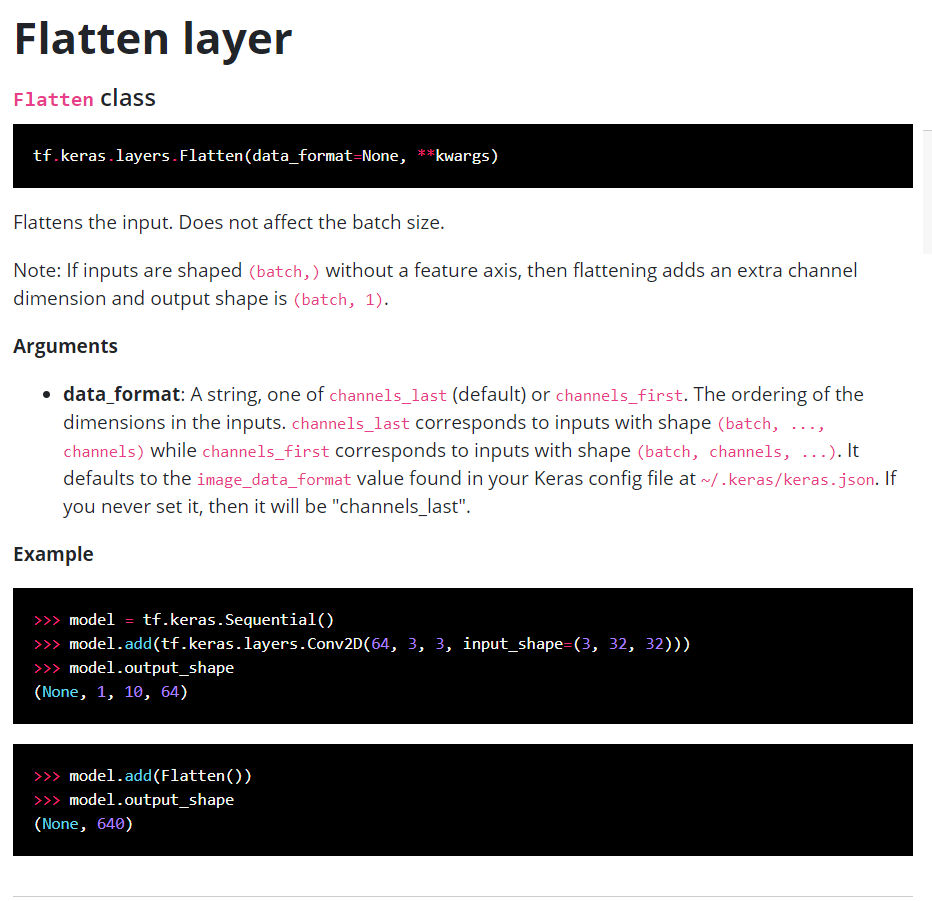

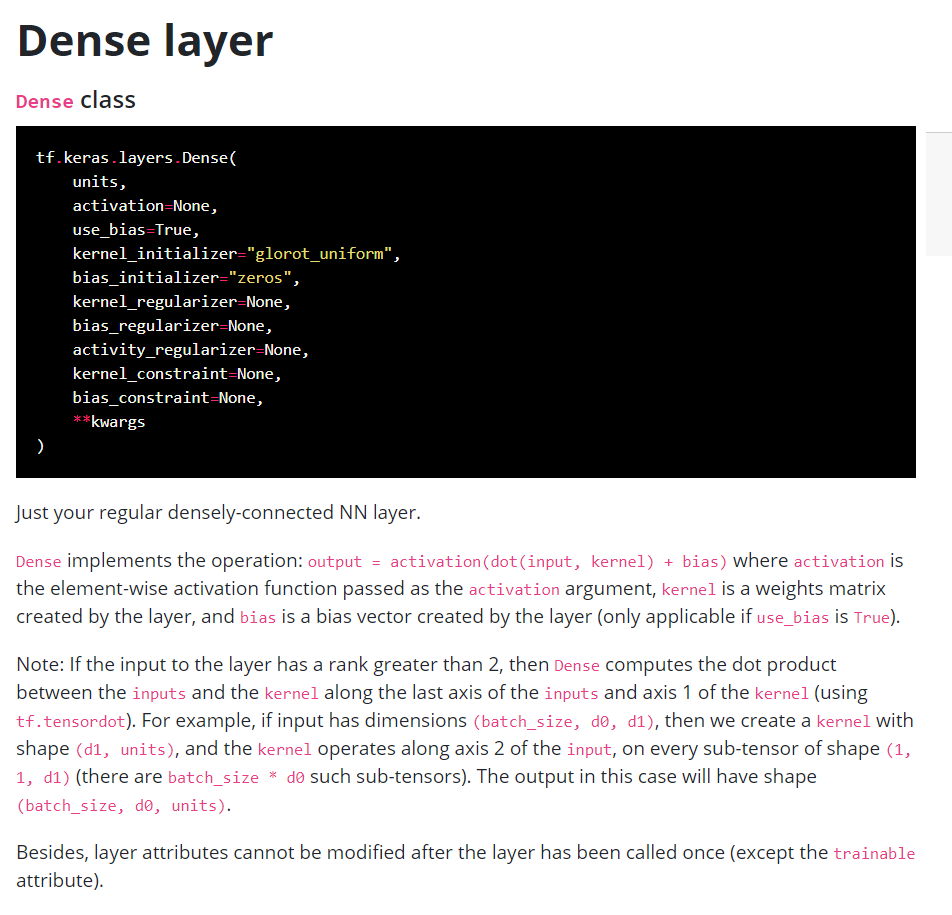

### Trying to Build same architecture
https://poloclub.github.io/cnn-explainer/
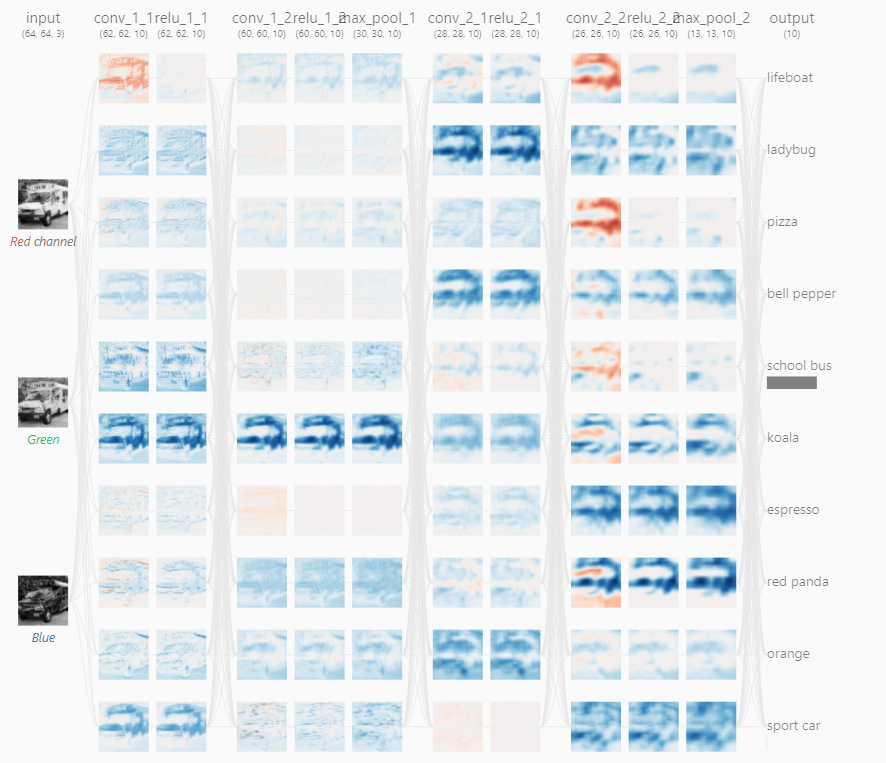

### Importing Required Libraries

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

> Initialising the CNN

In [4]:
classifier = Sequential()

> Block 1 : Convolution and Relu (as per the above architecture)

In [5]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

>Input Shape is only given to the Very first Layer 

> Block 2 : Convolution , Relu , MaxPooling (as per the above architecture)

In [6]:
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

> Block 3 : Convolution and Relu  (as per the above architecture)


In [7]:
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

> Block 4 : Convolution , Relu , MaxPooling (as per the above architecture)

In [8]:
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

> Block 5 : Flatten Layer  (as per the above architecture)


In [9]:
classifier.add(Flatten())

> Block 6 : Dense Layer  (as per the above architecture)


In [10]:
classifier.add(Dense(units = 128, activation = 'relu'))


classifier.add(Dense(units = 1, activation = 'sigmoid'))

> Compiling Model

> Optimizer : Adam

> Loss : binary_crossentropy

> metrics = ['accuracy'] , to print accuracy for each epoch

In [11]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

> We have finished building the Model
## Data Preparation

### Download the Data set or Create your own Data set

> `from keras.preprocessing.image import ImageDataGenerator`

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

> Directory Path of Train and Test dataset

### Note :
#### When Windows users copy Directory path , then path will have  backward slash '\'  . This will Create an 
## `OsError`
### Try to change it to Forward slash '/'

### When you Copy 
>M:\01 FSDS ineuron\Deep Learning\Computer Vision\firstClassfier\Master
### Change it to
>M:/01 FSDS ineuron/Deep Learning/Computer Vision/firstClassfier/Master

In [13]:
training_set = train_datagen.flow_from_directory('M:/01 FSDS ineuron/Deep Learning/Computer Vision/firstClassfier/Master',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('M:/01 FSDS ineuron/Deep Learning/Computer Vision/firstClassfier/Master',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


> fit the Model

In [14]:
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 20)

Epoch 1/1
100/100 [==============================] - 13s 132ms/step - loss: 0.0550 - accuracy: 0.9730 - val_loss: 2.4522e-09 - val_accuracy: 1.0000


> Save the Model into h5 file

In [15]:
classifier.save("model.h5")
print("Saved model to disk")

Saved model to disk


> We have finished Training the Model and Saved it into h5 file

> Now we need to test the Model with unseen images by the Model

> Make Sure , Whatever the Training Image Size you have taken , Same Testing image size should also be taken.

In [21]:
from tensorflow.keras.models import load_model
model=load_model("model.h5")

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('M:/01 FSDS ineuron/Deep Learning/Computer Vision/firstClassfier/test/cat1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
